In [ ]:
PS2

          Country     Deaths
58          CHINA  2075947.0
319        TURKEY  1148745.0
140          IRAN   995410.0
148         ITALY   498418.0
295         SYRIA   369224.0
119         HAITI   323478.0
23     AZERBAIJAN   317219.0
152         JAPAN   278607.0
17        ARMENIA   191890.0
146        ISRAEL   160120.0
233      PAKISTAN   145080.0
82        ECUADOR   135496.0
143          IRAQ   120200.0
323  TURKMENISTAN   117412.0
241          PERU   101461.0
248      PORTUGAL    83547.0
104        GREECE    80482.0
56          CHILE    64270.0
131         INDIA    61960.0
298        TAIWAN    57152.0


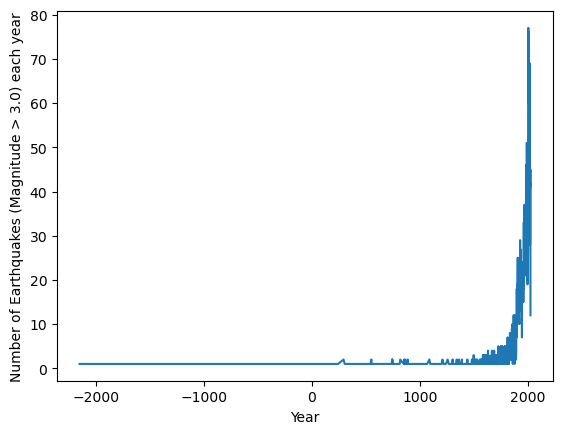

请输入国家名： CHINA


CHINA的地震总数: 623
最大震级发生日期: 1668-07-25, 地点: CHINA:  SHANDONG PROVINCE
               Country  Total_Earthquakes Max_Magnitude_Date  \
17               CHINA                623         1668-07-25   
86           INDONESIA                395         2004-12-26   
9                 IRAN                386          856-12-22   
38               JAPAN                359         2011-03-11   
6                ITALY                332         1915-01-13   
..                 ...                ...                ...   
196  TRINIDAD; GRENADA                  1         1888-01-10   
197            URUGUAY                  1               None   
198          TIMOR SEA                  1         1891-10-05   
200            BALKANS                  1               None   
0                  NaN                  0               None   

                          Max_Magnitude_Location  
17                     CHINA:  SHANDONG PROVINCE  
86   INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST  
9         

In [5]:
#1.1
import pandas as pd

#导入数据,read_csv可读取不止csv格式的文件，“.tsv”文件每一行数据用制表符分开，使用“\t”
Sig_Eqs = pd.read_csv('earthquakes-2024-11-03_17-07-12_+0800.tsv',sep='\t')
#从数据中地区一列中提取国家，并命名为country，注意是Sig_Eqs中的一列数据
Sig_Eqs['Country'] = Sig_Eqs['Location Name'].str.split(':').str[0]
#将数据按国家分类，对分类后的数据的死亡人数列进行加和，命名为total_deaths，“reset_index()”作用在分组后对索引恢复默认排序
total_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()
#按死亡总人数对数据进行排序，降序排序，取前20个国家输出
top20_countries = total_deaths.sort_values(by='Deaths', ascending=False).head(20)
print(top20_countries)

#1.2
import matplotlib.pyplot as plt

# 筛选震级 > 3.0 的地震
morethan3_eqs = Sig_Eqs[Sig_Eqs['Mag'] > 3.0]

# 按年进行分组并计算每年的总数，size对于二维数据返还行*列的元素数，对于列数据返还元素数
eqs_eachyear = morethan3_eqs.groupby('Year').size()

# 绘图
plt.figure
eqs_eachyear.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes (Magnitude > 3.0) each year')
plt.savefig("plot1.2.png")  # 保存为 PNG 文件
plt.show()

#1.3
# 定义函数 CountEq_LargestEq
def CountEq_LargestEq(country):
    # 筛选给定国家的数据，并创建副本以避免 SettingWithCopyWarning
    country_data = Sig_Eqs[Sig_Eqs['Country'] == country].copy()
    
    # 处理 NaN 值
    country_data.fillna({'Mo': 0, 'Dy': 0}, inplace=True)

    # 计算地震总数
    total_eqs = country_data.shape[0]

    # 找到最大震级及其日期和地点
    if total_eqs > 0 and not country_data['Mag'].isnull().all():
        max_eq = country_data.loc[country_data['Mag'].idxmax()]
        max_magnitude_date = f"{int(max_eq['Year'])}-{int(max_eq['Mo']):02d}-{int(max_eq['Dy']):02d}"
        max_magnitude_location = max_eq['Location Name']
    else:
        max_magnitude_date = None
        max_magnitude_location = None

    return total_eqs, max_magnitude_date, max_magnitude_location

# 让用户输入一个国家名
user_country = input("请输入国家名：")
total_eqs, max_date, max_location = CountEq_LargestEq(user_country)

# 输出结果
print(f"{user_country}的地震总数: {total_eqs}")
print(f"最大震级发生日期: {max_date}, 地点: {max_location}")

# 对每个国家应用 CountEq_LargestEq，按地震总数降序报告结果
country_summary = Sig_Eqs['Country'].unique()
results = []

for country in country_summary:
    total_eqs, max_date, max_location = CountEq_LargestEq(country)
    results.append([country, total_eqs, max_date, max_location])

# 创建结果 DataFrame 并按地震总数降序排序
results_df = pd.DataFrame(results, columns=['Country', 'Total_Earthquakes', 'Max_Magnitude_Date', 'Max_Magnitude_Location'])
results_df.sort_values(by='Total_Earthquakes', ascending=False, inplace=True)

# 输出结果
print(results_df)

C:\Users\86153\AppData\Local\Temp\ipykernel_16300\2335590964.py:3: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Baoan_Weather_1998_2022.csv')


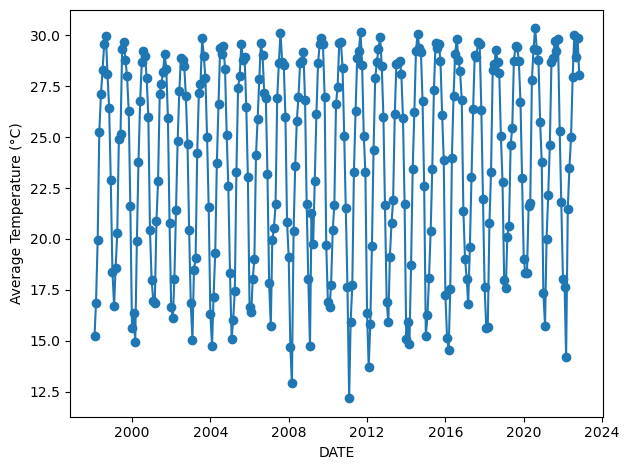

In [17]:
#2.0
# 读取 CSV 文件
data = pd.read_csv('Baoan_Weather_1998_2022.csv')

# 进一步过滤，保留只有 ,1 和 ,5 的数据
import numpy as np
data = data[np.logical_or(data['TMP'].str.contains(',1'), data['TMP'].str.contains(',5'))]

# 还原为摄氏度
data['TMP'] = data['TMP'].str.extract(r'(\d+),')[0].astype(float) / 10

# 将观测时间转换为日期格式
data['DATE'] = pd.to_datetime(data['DATE'])

# 设置日期为索引，在处理按时间分组、重采样等任务时，更加简便
data.set_index('DATE', inplace=True) 

# 按月计算平均气温
monthly_avg_tmp = data['TMP'].resample('ME').mean()
#monthly_avg_tmp = data.groupby(data['DATE'].dt.to_period('M'))['TMP'].mean()
plt.plot(monthly_avg_temp.index, monthly_avg_temp, marker='o')
#plt.plot(data['DATE'], data['TMP'], marker='o')
plt.xlabel('DATE')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout() #调整子图之间的布局，避免标题、轴标签等内容被遮挡或重叠。自动调整排版
plt.savefig('plot2.0.png')
plt.show()



C:\Users\86153\AppData\Local\Temp\ipykernel_16300\2745453970.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


            NAME  WMO_WIND
665954  PATRICIA     185.0
427636     ALLEN     165.0
178209       NaN     160.0
482074   GILBERT     160.0
552459     LINDA     160.0
605746     WILMA     160.0
689332    DORIAN     160.0
560437     MITCH     155.0
604981      RITA     155.0
629194      RICK     155.0


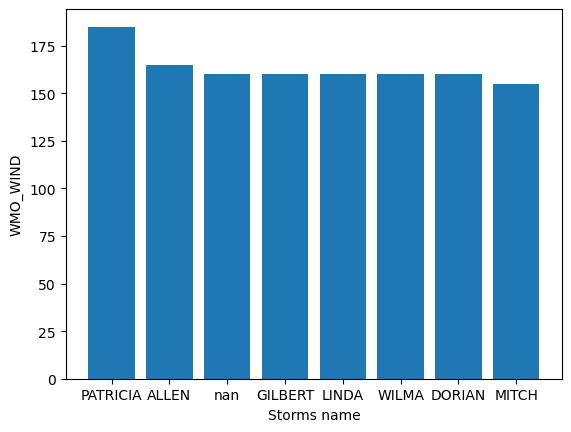

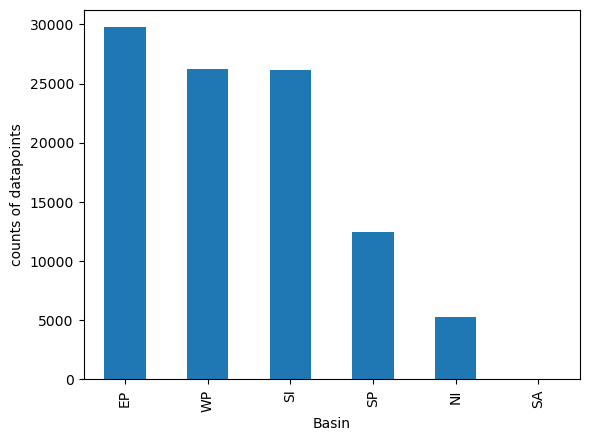

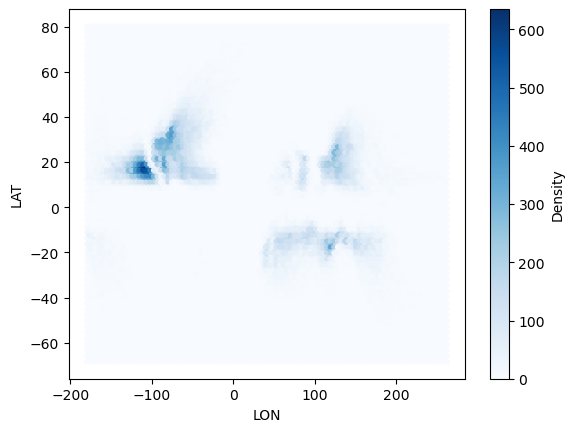

C:\Users\86153\AppData\Local\Temp\ipykernel_16300\2745453970.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mangkhut['DATE_NUM'] = pd.to_datetime(mangkhut['ISO_TIME']).astype('int64') / 10**9


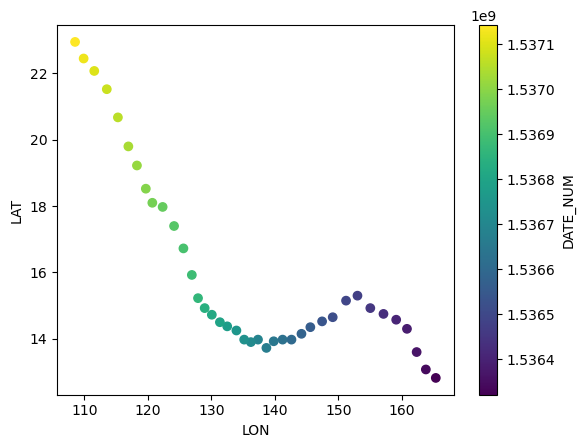

                  SID  SEASON  NUMBER BASIN SUBBASIN    NAME  \
351439  1970151N11261    1970      46    EP       MM   ADELE   
351441  1970151N11261    1970      46    EP       MM   ADELE   
351443  1970151N11261    1970      46    EP       MM   ADELE   
351445  1970151N11261    1970      46    EP       MM   ADELE   
351447  1970151N11261    1970      46    EP       MM   ADELE   
...               ...     ...     ...   ...      ...     ...   
703054  2021311N13248    2021      40    EP       MM  SANDRA   
703056  2021311N13248    2021      40    EP       MM  SANDRA   
703058  2021311N13248    2021      40    EP       MM  SANDRA   
703060  2021311N13248    2021      40    EP       MM  SANDRA   
703062  2021311N13248    2021      40    EP       MM  SANDRA   

                  ISO_TIME NATURE      LAT      LON  WMO_WIND WMO_PRES  \
351439 1970-05-30 12:00:00     TS  11.1000  -98.600      45.0            
351441 1970-05-30 18:00:00     TS  11.0906  -99.301      45.0            
351443 19

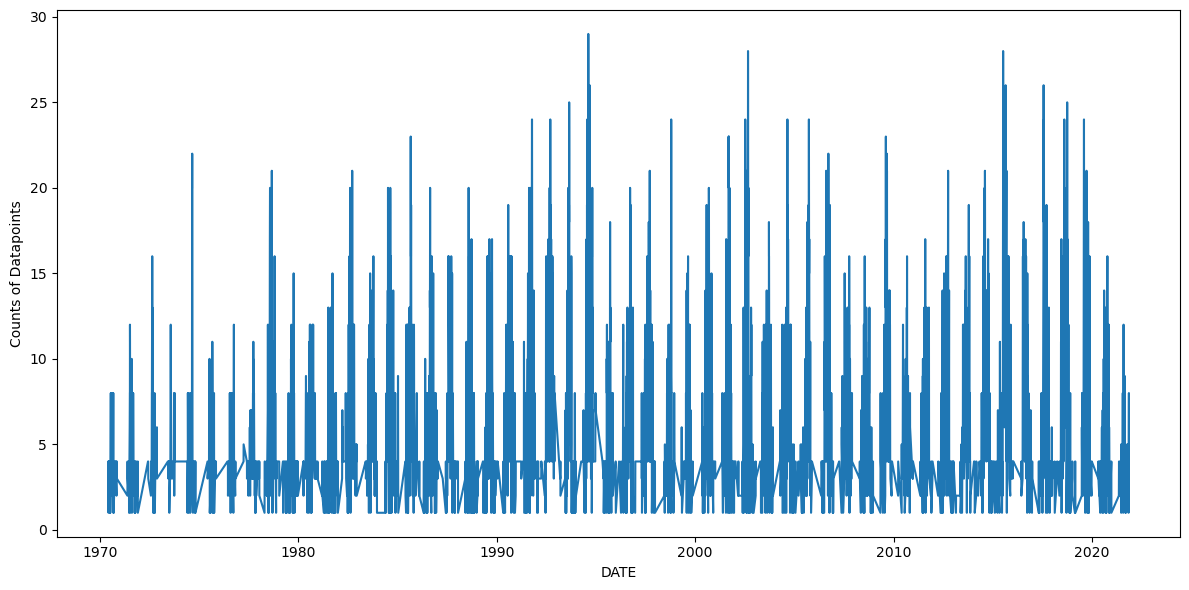

          SEASON      NUMBER        LAT         LON   WMO_WIND    DIST2LAND  \
DOY                                                                           
1    1997.277778  115.611111   9.615478  133.468500  38.055556   670.277778   
2    1994.600000  120.666667   9.616363  134.404467  43.666667   846.466667   
3    2004.777778  104.555556  10.604418  129.143944  48.333333   849.055556   
4    2000.307692   85.769231  10.918687  133.876462  48.461538  1064.923077   
5    1993.800000   55.000000   9.365608  136.213800  51.000000  1084.400000   
..           ...         ...        ...         ...        ...          ...   
362  1998.968750  106.625000  10.479446  136.362250  45.937500   876.906250   
363  1997.760000  109.040000  10.466783  142.281120  48.400000  1043.880000   
364  1995.636364  111.545455  11.533117  145.179773  43.636364  1216.863636   
365  1994.529412  114.235294   8.967168  143.017941  39.117647   803.235294   
366  2000.000000  113.000000  13.425000  129.112500 

C:\Users\86153\AppData\Local\Temp\ipykernel_16300\2745453970.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DOY'] = filtered_df['ISO_TIME'].dt.dayofyear
C:\Users\86153\AppData\Local\Temp\ipykernel_16300\2745453970.py:106: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomalies = daily_anomalies.resample('A').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
#从 CSV 文件中读取前 17 列，并跳过前两行。将ISO_TIME列解析为datetime类型，并将NOT_NAMED和NAME转换为缺失值 (NaN)。再显示DataFrame的前5行
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()
#3.1查找最大风速的10个飓风
#确保 'WMO_WIND' 列是数值类型，to_numeric转化为数值类型，通常是float，并在这个函数中将无法转换的值变为 NaN
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')  
# 删除 SID 或 WMO_WIND 中的 NaN 值，subset可指定一列或多列，dropna直接删除含有NaN值的这一行
df = df.dropna(subset=['SID', 'WMO_WIND'])
#查找最大风速的10个飓风，idxmax获得的是索引，loc获得的是索引所在行的数据，只提取name和wmo_wind
largest_hurricanes = df.loc[df.groupby('SID')['WMO_WIND'].idxmax()][['NAME', 'WMO_WIND']].nlargest(10, 'WMO_WIND')
print(largest_hurricanes[['NAME', 'WMO_WIND']])

#3.2画出20个最强风速飓风的风速条形图
#找出20个最强风速的飓风
strongest_hurricanes = df.nlargest(20, 'WMO_WIND')
#确保 NAME 列是字符串类型
strongest_hurricanes['NAME'] = strongest_hurricanes['NAME'].astype(str)
plt.bar(strongest_hurricanes['NAME'], strongest_hurricanes['WMO_WIND'])
plt.xlabel('Storms name')
plt.ylabel('WMO_WIND')
plt.savefig('plot3.2.png')
plt.show()

#3.3按盆地绘制数据点数量的条形图，value_counts提取不同区域（如海洋盆地）出现的频率，结果是一个按频率排序的 Series
basin_counts = df['BASIN'].value_counts()
basin_counts.plot(kind='bar')
plt.xlabel('Basin')
plt.ylabel('counts of datapoints')
plt.savefig('plot3.3.png')
plt.show()

#3.4绘制经纬度的六边形图，用hexbin绘制六边形图，gridsize规定六边形的大小，cmap即colormap规定使用的颜色
plt.hexbin(df['LON'], df['LAT'], gridsize=100, cmap='Blues')
plt.xlabel('LON')
plt.ylabel('LAT')
#添加色条并标注
plt.colorbar(label='Density')
plt.savefig('plot3.4.png')
plt.show()

#3.5查找并绘制2018年强台风“山竹”的路径
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['SEASON'] == 2018)]
# 使用 pd.to_datetime() 将 ISO_TIME 列转换为unix时间戳，将毫秒转换为秒
mangkhut['DATE_NUM'] = pd.to_datetime(mangkhut['ISO_TIME']).astype('int64') / 10**9 
# 绘制散点图,viridis表示从紫色到黄色，较高的值使用较亮的颜色
plt.scatter(mangkhut['LON'], mangkhut['LAT'], c=mangkhut['DATE_NUM'], cmap='viridis')
plt.xlabel('LON')
plt.ylabel('LAT')
plt.colorbar(label='DATE_NUM')
plt.savefig('plot3.5.png')
plt.show()


#3.6筛选1970年以来的“西北太平洋”和“东太平洋”盆地的数据
filtered_df = df[(df['BASIN'].isin(['WP', 'EP'])) & (df['SEASON'] >= 1970)]
print(filtered_df)

#3.7绘制每日数据点数量,date只提取日期不提取时间，value_counts默认按数量降序排列，用sort_index恢复时间索引从小到大排序
daily_counts = filtered_df['ISO_TIME'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line')
plt.xlabel('DATE')
plt.ylabel('Counts of Datapoints')
plt.tight_layout()
plt.savefig('plot3.7.png')
plt.show()

#3.8计算气候学
filtered_df['DOY'] = filtered_df['ISO_TIME'].dt.dayofyear
# 选择数值类型的列
numeric_cols = filtered_df.select_dtypes(include=['number']).columns
# 根据 'DOY' 进行分组，并计算数值列的均值
climatology = filtered_df.groupby('DOY')[numeric_cols].mean()
print(climatology)

#3.9计算每日数据点数量的异常值
# daily_anomalies = filtered_df.groupby('DOY') - climatology('dim = DOY')          #.reindex(daily_counts.index, fill_value=0)
# print(daily_anomalies)

# 选择数值类型的列
numeric_columns = filtered_df.select_dtypes(include=['number']).columns
# 计算数值列的每日均值
daily_mean = filtered_df[numeric_columns].groupby('DOY').mean()
# 计算每日的异常值
daily_anomalies = daily_mean - climatology[numeric_columns]
print(daily_anomalies)

#3.10按年汇总异常值并绘制
annual_anomalies = daily_anomalies.resample('A').sum()
annual_anomalies.plot()
plt.xlabel('YEAR')
plt.ylabel('counts of anomalies')
plt.show()

   DATE  X/Longitude  Y/Latitude  Z/Altitude  Error(m)   X_error   Y_error  \
0  1300   118.578926   32.057368      145.30  0.343380 -0.164904 -0.146474   
1  1301   118.578928   32.057367      145.26  0.347774 -0.146957 -0.166667   
2  1302   118.578985   32.057355      145.10  0.297936 -0.218707 -0.116085   
3  1303   118.579100   32.057338      144.98  0.227465 -0.216951 -0.062851   
4  1304   118.579208   32.057322      145.34  0.391419 -0.280277 -0.043447   

    Z_error  
0 -0.263176  
1 -0.267530  
2 -0.165702  
3  0.026871  
4  0.269751  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         725 non-null    int64  
 1   X/Longitude  724 non-null    float64
 2   Y/Latitude   724 non-null    float64
 3   Z/Altitude   724 non-null    float64
 4   Error(m)     725 non-null    float64
 5   X_error      725 non-null    float64
 6   Y_

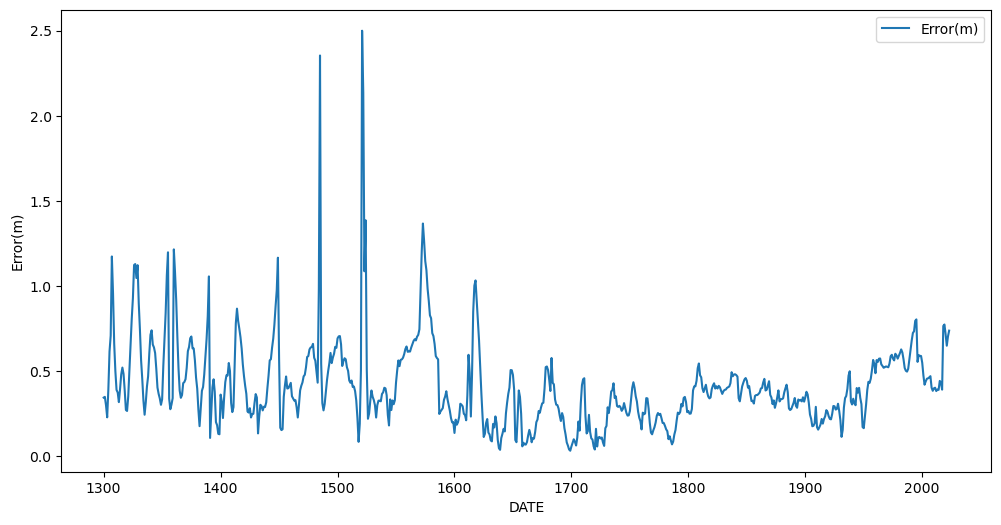

mean:0.41337951232596687
median:0.3729797005
var:0.06490550678160738
std:0.2547655918321926
max:2.499659061
min:0.031242866


In [35]:
#4.1
import pandas as pd

# 尝试使用不同的编码格式来读取文件
data = pd.read_csv('POS_residual_of_camera.csv')#, encoding='latin1')#encoding='ISO-8859-1')
# 查看数据的前几行
print(data.head())
# 查看数据的描述信息
print(data.info())
# 删除可能存在的缺失值
filtered_data = data.dropna()

#4.2
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
#plt.plot(filtered_data.index, filtered_data['Error(m)'], label='Error(m)')
plt.plot(filtered_data['DATE'], filtered_data['Error(m)'], label='Error(m)')
plt.xlabel('DATE')
plt.ylabel('Error(m)')
#添加图例
plt.legend()
plt.savefig('plot4.2.png')
plt.show()

#4.3
mean_error = filtered_data['Error(m)'].mean()
print(f"mean:{mean_error}")
median_error = filtered_data['Error(m)'].median()
print(f"median:{median_error}")
var_error = filtered_data['Error(m)'].var()
print(f"var:{var_error}")
std_error = filtered_data['Error(m)'].std()
print(f"std:{std_error}")
max_error = filtered_data['Error(m)'].max()
print(f"max:{max_error}")
min_error = filtered_data['Error(m)'].min()
print(f"min:{min_error}")